#  Nanofiltration de jus de fruit

La concentration d’un jus de fruit est réalisée par nanofiltration1 sur une membrane tubulaire de 6 mm de diamètre et de 1,2 m de longueur. La nanofiltration est réalisé en mode tangentielle (cross-flow filtration) c'est à dire avec une vitesse de circulation dans le tube (parrallèle à la membrane) et une vitesse de perméation (perpendiculaire à la membrane). Le jus de fruit a une concentration massique de 0,2 % et est retenu totalement par la membrane.

*Données :*
- *Jus de fruit à 0.2% massique : $\rho$=1200 kg/m3, $\mu$=0,001 Po, D=7.10-10 m2.s-1*
- *Pression osmotique du jus de fruit : $\Pi(bar)=\frac{133.75c}{100-c}$  avec c concentration en % massique*

1 ces calculs peuvent aussi être utilisés pour de l'ultrafiltration ou de l'osmose inverse


**1. En considérant l’accumulation du jus de fruit à la surface de la membrane, calculer la concentration en jus de fruit à la surface de la membrane, cm, pour un flux de perméation de 10-6 m/s et 2.10-6 m/s et des vitesses de circulation de 0,05 et 0,1 m/s. Commenter les résultats.**

>Lors de la filtration, il y a un couplage entre la convection due à la perméation, J, qui amène les solutés (ou les colloïdes) vers la membrane et la diffusion, D, dans la couche limite, $\delta$, qui engendre un "retro"-transport depuis la membrane vers la solution (ou la dispersion). On peut démontrer (voir cours) en réalisant un bilan différentiel sur un élément de volume dans la couche limite que le profil de concentration est exponentiel :
$$c=c_b e^{Jx/D}$$
>La concentration à la membrane, $c_m$, est alors :
$$c_m=c_b e^{Pe}$$
>où, $Pe=\frac{J\delta}{D}$, est le nombre de Péclet qui caractérise le rapport entre $\frac{le~flux~advectif}{le~flux~diffusif}$. Pour calculer le nombre de Péclet il est nécessaire d'estimer l'épaisseur de la couche limite. Il est possible de l'estimer à partir d'une corrélation entre nombre sans dimensions pour le transfert dans un tube.
$$Sh=1.86(Re~Sc~\frac{d_H}{L})^{0.33}$$ pour Re<2100
$$Sh=0.023Re^{0.8}Sc^{0.33}$$ pour Re>2100
> Le code suivant permet de :
>1. calculer l'épaisseur de couche limite
>2. caculer le nombre de Péclet
>3. calculer la concentration à la membrane

1190.4761904761906
L'épaisseur de couche limite est de 256.7 micromètres pour une vitesse tangentielle de  0.05 m/s
2.7270148074714534e-06
L'épaisseur de couche limite est de 204.2 micromètres pour une vitesse tangentielle de  0.1 m/s
3.427894085510686e-06

   J   \   u    |              0.05                0.1
------------------------------------------------------------------------------
                |       Pe=    0.367               0.292
  1.00e-06      |          
                |       cm=    0.289               0.268
------------------------------------------------------------------------------
                |       Pe=    0.733               0.583
  2.00e-06      |          
                |       cm=    0.416               0.358


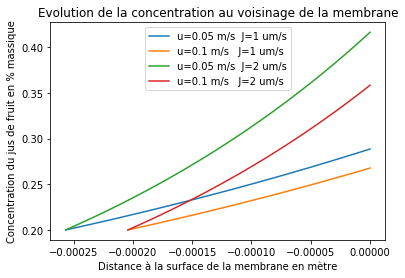

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
#DATA
#Solution
c0=0.2 #% massique
D=7.e-10 #m2/s
ro=1200 #kg m-3
mu=0.001 #Pa.s
#membrane
d_H=6e-3 #m
L=1.2 #m
# conditions hydrodynamiques
u=[0.05, 0.1] #m/s
J=[1.e-6,2.e-6] #m/s

#Calcul de l'épaisseur de couche limite, du nombre de Péclet et de la concentration à la membrane
deltal=np.zeros(len(u))
Re=np.zeros(len(u))
Sh=np.zeros(len(u))
Pe=np.zeros(len(u)*len(J))
cm=np.zeros(len(u)*len(J))
Sc=mu/(ro*D)
print (Sc)

for i in range(len(u)):
    Re[i]=ro*u[i]*d_H/mu
    if Re[i]<2100:
        Sh[i]=1.86*(Re[i]*Sc*d_H/L)**0.33
    else:
        Sh[i]=0.023*Re[i]**0.8*Sc**0.33
    deltal[i]=d_H/Sh[i]
    print ('L\'épaisseur de couche limite est de', round(deltal[i]*1e6, 1),'micromètres pour une vitesse tangentielle de ', u[i],'m/s' )
    print (D/deltal[i])
    for j in range(len(J)):
        Pe[i+len(u)*j]=J[j]*deltal[i]/D
        cm[i+len(u)*j]=c0*np.exp(Pe[i+len(u)*j])
print()  
print ('   J   \   u    |             ', round(u[0],3),'              ', round(u[1],3))
print ('------------------------------------------------------------------------------')
print ('                |       Pe=   ', round(Pe[0],3), '             ', round(Pe[1],3))
print (' ', "%.2e"%J[0],'     |          ')
print ('                |       cm=   ', round(cm[0],3), '             ', round(cm[1],3))
print ('------------------------------------------------------------------------------')
print ('                |       Pe=   ', round(Pe[2],3), '             ', round(Pe[3],3))
print (' ', "%.2e"%J[1],'     |          ')
print ('                |       cm=   ', round(cm[2],3), '             ', round(cm[3],3))

#Tracé du profil de concentration près de la membrane
x0=np.linspace(-deltal[0],0,100)
x1=np.linspace(-deltal[1],0,100)
c_0=c0*np.exp(Pe[0]*(1+x0/deltal[0]))
c_1=c0*np.exp(Pe[1]*(1+x1/deltal[1]))
c_2=c0*np.exp(Pe[2]*(1+x0/deltal[0]))
c_3=c0*np.exp(Pe[3]*(1+x1/deltal[1]))
plt.plot(x0,c_0, label='u=0.05 m/s  J=1 um/s') 
plt.plot(x1,c_1, label='u=0.1 m/s   J=1 um/s')
plt.plot(x0,c_2, label='u=0.05 m/s  J=2 um/s')
plt.plot(x1,c_3, label='u=0.1 m/s   J=2 um/s')
plt.legend(loc='upper center')
plt.title('Evolution de la concentration au voisinage de la membrane')
plt.xlabel('Distance à la surface de la membrane en mètre')
plt.ylabel('Concentration du jus de fruit en % massique')
plt.show()

>On note que l'augmentation du flux de perméation engendre une accumulation à la membrane plus importante. Par contre, l'augmentation de la vitesse tangentielle permet de réduire l'accumulation à la membrane. On appelle d'ailleurs cette vitesse la vitesse de balayage tangentiel car elle permet de réduire l'accumulation à la membrane : l'épaisseur de couche limite est plus petite ce qui favorise le transfert de matière par diffusion vers la solution. Mais il faut noter que l'augmentation de la vitesse tangentielle nécessite de l'énergie : il faut donc trouver un compromis.

Le flux de solvant à travers la membrane est directement relié à la concentration à la surface du filtre par la relation suivante : 			 
$$J=\frac{\Delta P-\Delta\Pi}{\mu R_m}$$
où 	
- $\Delta P$ est la différence de pression à travers la membrane
- $\Delta\Pi$ est la différence de pression osmotique à travers la membrane qui s'écrit $\Pi(c_m)-\Pi(c_p)=\Pi(c_m)$ si la membrane ne retient par le soluté
- $R_m$ est la résistance hydraulique de la membrane = 1.10+14 m-1

**2. Avec les relations précédentes, comment peut-on calculer la concentration à la membrane et le flux de perméation pour une différence de pression donnée ?**

> L'analyse du transfert de matière a permis de relier la concentration à la membrane, $c_m$ aux conditions opératoires, Pe :
$$c_m=c_b e^{Pe}$$
>L'analyse du transfert de quantité de mouvement (mécanique des fluides) permet de traduire l'effet de la concentration, $c_m$, à la membrane (par le biais de la pression osmotique, $\Pi(c_m)$) à travers la loi de Darcy modifiée :
$$J=\frac{\Delta P-\Pi(c_m)}{\mu R_m}$$
>On dispose donc d'un système de deux équations à deux inconnues. Si la pression trans-membranaire est fixée, les inconnus sont le flux de perméation et la concentration à la membrane. Si on connait le flux à travers la membrane, les inconnus sont la pression transmembranaire et la concentration à la membrane. Il n' y a pas de solution analytique pour ces équations car le système est non linéaire. Il est par contre possible de combiner les deux équations afin d'avoir une équation à une inconnue ici par exemple en fonction de $c_m$ :
$$\frac{D}{\delta}ln(\frac{c_m}{c_0})-\frac{\Delta P-10^{+5}\frac{133.75c_m}{100-c_m}}{\mu R_m}=0$$


**3. Réaliser ce calcul pour des pressions de 2, 5 et 10 bars et pour des vitesses de 0.05 m/s et 0.1 m/s.**

>Le code suivant permet de résoudre le système d'équations avec la séquence de calculs suivantes :
1. définition de la function pout le calcul de la pression osmotique
2. definition de la fonction à une inconnu à résoudre pour déterminer cm
3. boucle de calcul de cm pour les différentes valeurs de couche limite et de pression (deux boucles imbriquées pour balayer toutes les combinaisons de valeurs). Les valeurs de cm et J sont stockées dans un tableau.


In [8]:
Rm=1e14
#Fonction pour le calcul de la pression osmotique en Pa
def PI(c):
    PI=1.e5*(133.75*c/(100.-c))
    return PI
#Foncion à résoudre pour déterminer la concentration à la membrane
def f(cm):
    f=(D/delta)*np.log(cm/c0)-(DP-PI(cm))/(mu*Rm)
    return f
#creation des tableaux de valeurs
DPl=np.linspace(0,20.e5,21)
cm=np.zeros(len(deltal)*len(DPl))
J=np.zeros(len(deltal)*len(DPl))
print ('u(m/s)    delta(m)    PTM(Pa)    cm(%)       J(m/s)       ')
for i in range(len(deltal)):
    for j in range(len(DPl)):
        delta=deltal[i]
        DP=DPl[j]
        cm[j+len(DPl)*i]=newton(f,c0)
        J[j+len(DPl)*i]=(D/delta)*np.log(cm[j+len(DPl)*i]/c0) 
        if j%2 ==0:
            print (u[i],'   ',  "%.2e"%delta,'   ', DP,'   ',round(cm[j+len(DPl)*i],3),'   ', "%.2e"%J[j+len(DPl)*i]) 
 

u(m/s)    delta(m)    PTM(Pa)    cm(%)       J(m/s)       
0.05     2.57e-04     0.0     0.183     -2.45e-07
0.05     2.57e-04     200000.0     0.35     1.53e-06
0.05     2.57e-04     400000.0     0.634     3.15e-06
0.05     2.57e-04     600000.0     1.065     4.56e-06
0.05     2.57e-04     800000.0     1.651     5.76e-06
0.05     2.57e-04     1000000.0     2.374     6.75e-06
0.05     2.57e-04     1200000.0     3.208     7.57e-06
0.05     2.57e-04     1400000.0     4.121     8.25e-06
0.05     2.57e-04     1600000.0     5.09     8.83e-06
0.05     2.57e-04     1800000.0     6.095     9.32e-06
0.05     2.57e-04     2000000.0     7.123     9.74e-06
0.1     2.04e-04     0.0     0.186     -2.49e-07
0.1     2.04e-04     200000.0     0.317     1.58e-06
0.1     2.04e-04     400000.0     0.523     3.30e-06
0.1     2.04e-04     600000.0     0.83     4.88e-06
0.1     2.04e-04     800000.0     1.256     6.30e-06
0.1     2.04e-04     1000000.0     1.805     7.54e-06
0.1     2.04e-04     1200000.0   

**4. Tracer le flux de perméation en fonction de la différence de pression pour les deux vitesses et conclure.**

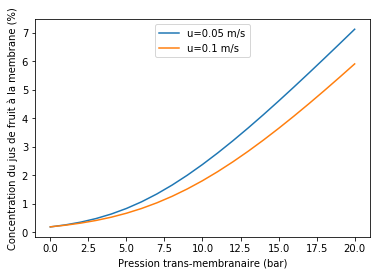

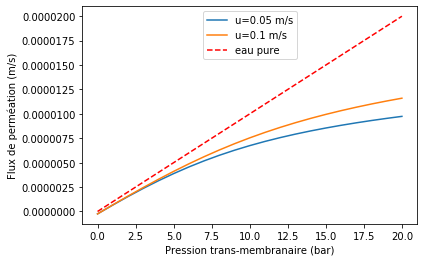

In [13]:
#Tracé de la concentration à la membrane
plt.plot(DPl/1e5,cm[:j+1], label='u=0.05 m/s') 
plt.plot(DPl/1e5,cm[j+1:], label='u=0.1 m/s') 
plt.legend(loc='upper center')
#plt.title('Evolution de la concentration au voisinage de la membrane en fonction de pression trans-membranaire')
plt.xlabel('Pression trans-membranaire (bar)')
plt.ylabel('Concentration du jus de fruit à la membrane (%)')
plt.show()        
        
#Tracé du flux de perméation
plt.plot(DPl/1e5,J[:j+1], label='u=0.05 m/s') 
plt.plot(DPl/1e5,J[j+1:], label='u=0.1 m/s')
plt.plot(DPl/1e5,DPl/(mu*Rm), 'r--', label='eau pure')
plt.legend(loc='upper center')
#plt.title('Evolution du flux de perméation en fonction de pression trans-membranaire')
plt.xlabel('Pression trans-membranaire (bar)')
plt.ylabel('Flux de perméation (m/s)')
plt.show() 

>On note que l'**augmentation de la pression** conduit toujours à une augmentation du flux de perméation. Toutefois, cette augmentation devient moins importante pour les hautes pressions car l'augmentation de la concentration à la membrane engendre une contre pression osmotique qui limite la perméation. On peut aussi noter pour les pressions inférieures à la pression osmotique de la dispersion que les flux de perméation sont négatifs : c'est un régime d'osmose et le flux de perméation est dirigé vers les hautes concentrations (c'est à dire du perméat vers le concentrat). Pour les pressions plus élevées, on force le fluide à aller du concentrat vers le filtrat : c'est le régime d'osmose-inverse. Ce type de calcul peut ainsi servir à calculer des unités de dessalement d'eau de mer par osmose inverse : il vous suffit de modifier les propriétés de la membrane, $R_m$ et la variation de la pression osmotique, $\Pi$ en fonction de la concentration (la pression osmotique des sels sera beaucoup élevée: l'eau de mer à une pression osmotique de 25 bars). Il faudra donc également examiner des gammes de pression plus élévées (>25 bars) pour décrire l'osmose inverse. 
>
> On note que l'**augmentation de la vitesse tangentielle** conduit à réduire la concentration à la membrane (effet du balayage tangentiel qui réduit l'épaisseur de la couche limite) et ainsi permet d'augmenter le flux de perméation (la contre pression osmotique est moindre).